<h1>Linear Regression Project with R</h1>
<p>I have acquired a dataset containing hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. The challenge is to predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.</p>

In [ ]:
#Install Required packages
install.packages('dplyr')
install.packages('ggplot2') #ggplot graph plotting library
install.packages('ggthemes') #ggplot themes
install.packages('corrgram') #to plot correlation
install.packages('corrplot') #to plot correlation
install.packages('caTools') # required randomly splitting data into training & testing sets

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
#Activate packages
library(dplyr)
library(ggplot2)
library(ggthemes)
library(corrgram)
library(corrplot)
library(caTools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



Read in the data which I'll assign to the variable 'bike'.

In [ ]:
bike <- read.csv('/content/bikeshare.csv')

In [ ]:
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


<h2>Exploratory Data Analysis</h2>

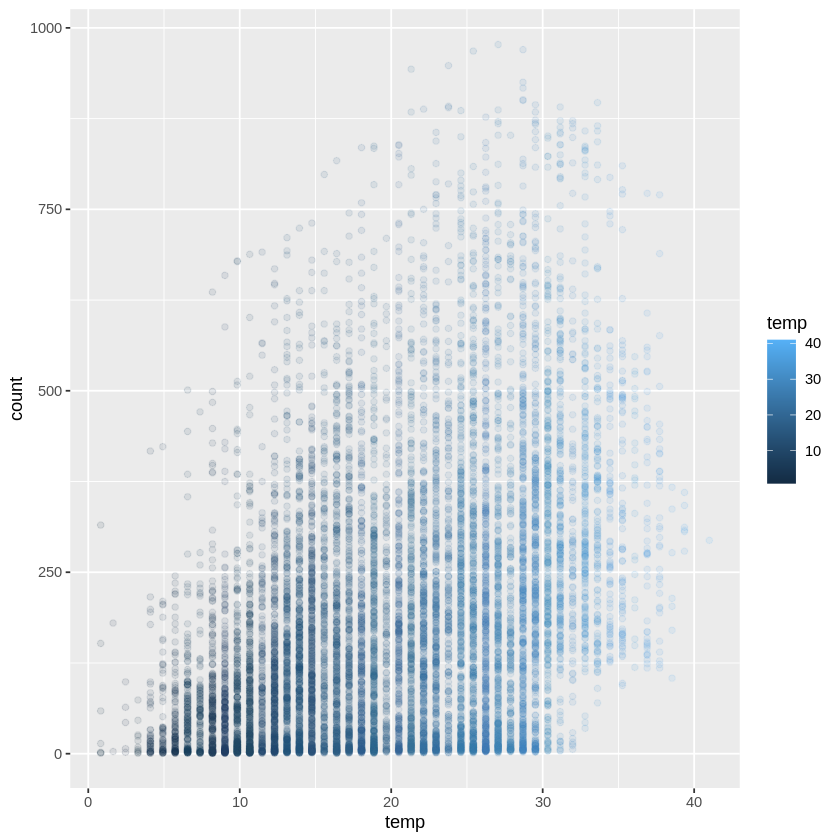

In [ ]:
ggplot(bike, aes(x=temp, y= count), show.legend = TRUE) + geom_point(aes(color=temp), alpha=1/10)

In [ ]:
#convert datetime into POSIXct:
bike$datetime <- as.POSIXct(bike$datetime)

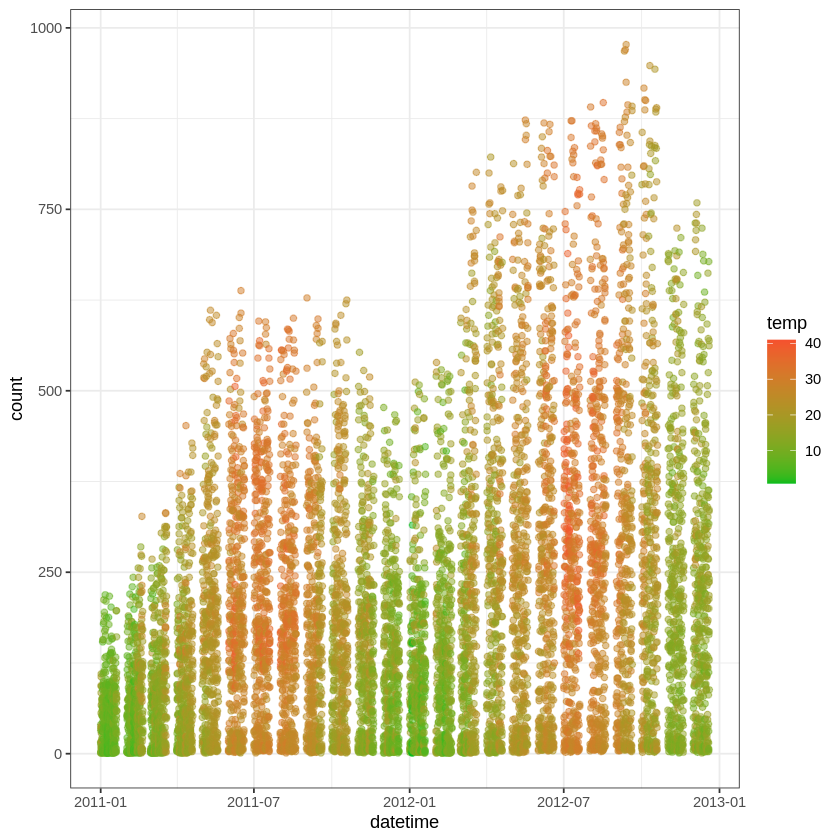

In [ ]:
#Visualise the temperature vs rental count
ggplot(bike, aes(x=datetime, y=count)) + geom_point(aes(color=temp),alpha=0.5) + scale_color_continuous(low="#08BC1C",high="#F6512E") + theme_bw()

<p>As you can see, theres a clear difference ints bike rentals between the seasons, with more bikes being hired as the day to day tempreture goes up. Also overall the two year time period we can see that the over bike rentals are increasing.</p>

I'll look at the correlation between tempreture and count.

$corr
           temp     count
temp  1.0000000 0.3944536
count 0.3944536 1.0000000

$corrPos
  xName yName x y      corr
1  temp  temp 1 2 1.0000000
2  temp count 1 1 0.3944536
3 count  temp 2 2 0.3944536
4 count count 2 1 1.0000000

$arg
$arg$type
[1] "full"




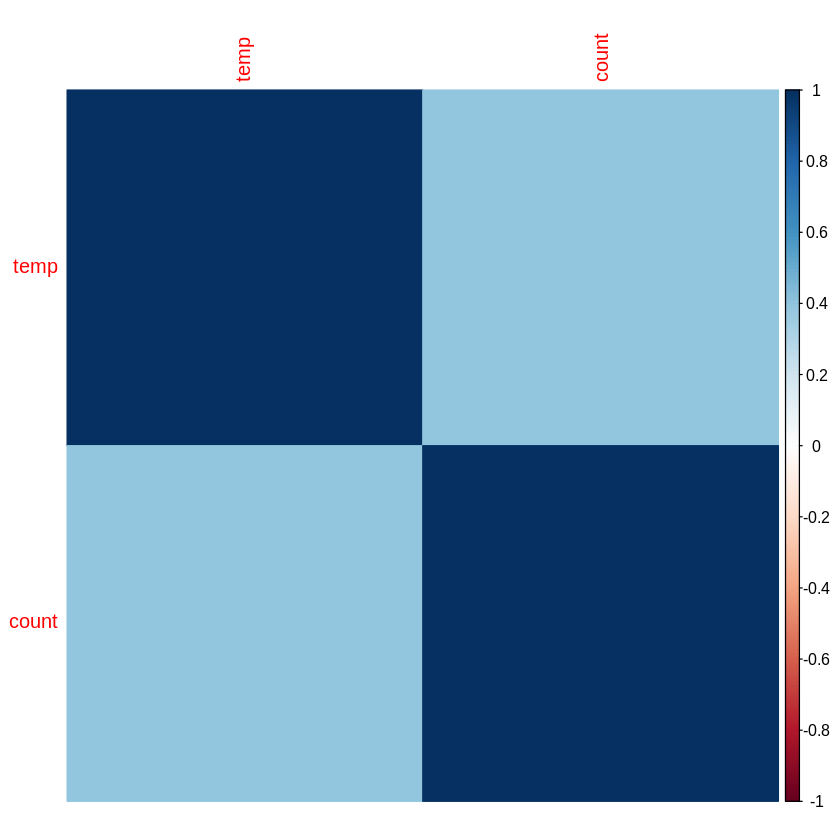

In [ ]:
cor.data <- cor(bike[,c('temp','count')])
print(corrplot(cor.data, method = 'color'))

Now I'll explore the seasonal data, using a boxplot.

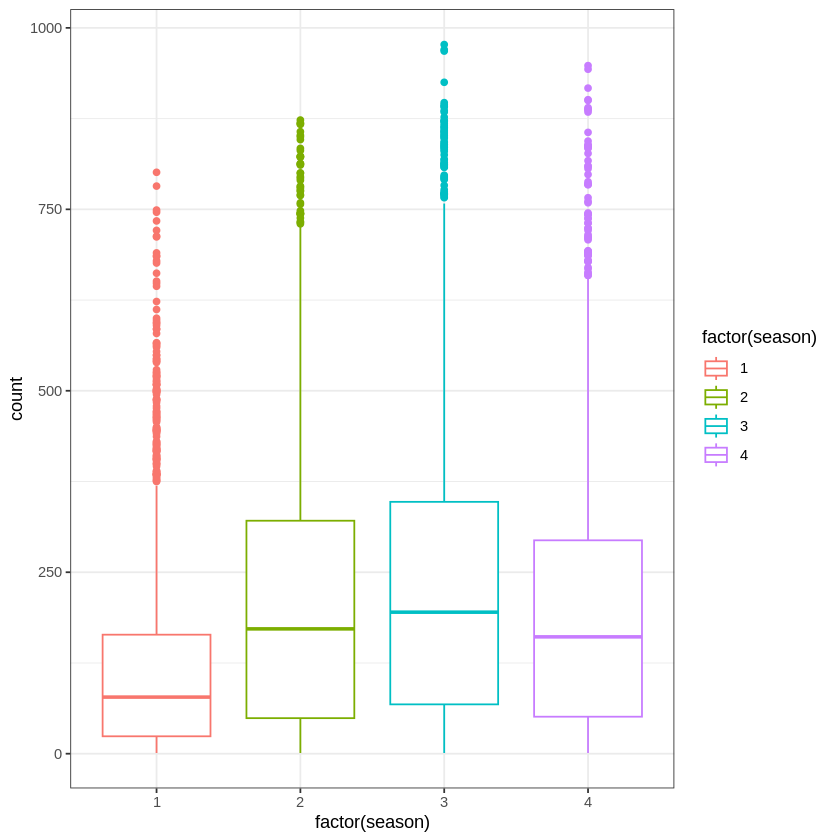

In [ ]:
ggplot(bike, aes(factor(season),count)) + geom_boxplot(aes(color=factor(season))) + theme_bw()

The box plot shows that there are less rentals in spring (1) then in winter (4).

## Feature Engineering
<p>I will engineer an hour column which will be create from the hour in the datetime column.</p>

In [ ]:
bike$hour <- sapply(bike$datetime, function(x){format(x, "%H")})

In [ ]:
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<chr>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


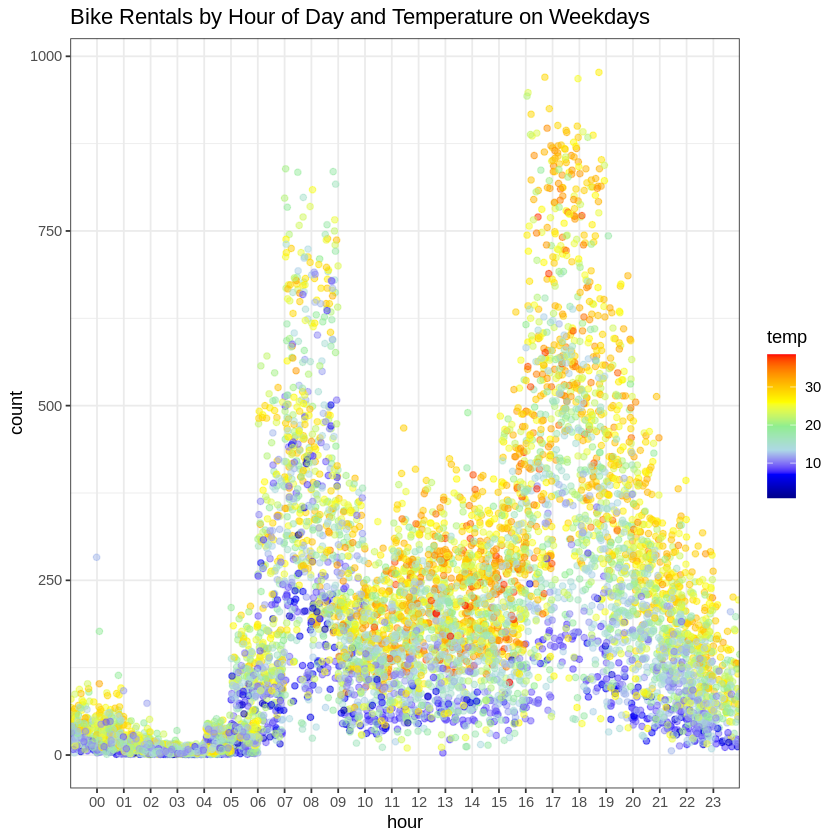

In [ ]:
#Visualise bike rentals by hour and temperature
pl <- ggplot(filter(bike,workingday==1), aes(hour, count))
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color = temp),alpha=0.5)
pl <- pl + scale_color_gradientn(colors = c('dark blue', 'blue', 'light blue', 'light green', 'yellow', 'orange', 'red'))
pl + theme_bw() + ggtitle("Bike Rentals by Hour of Day and Temperature on Weekdays")

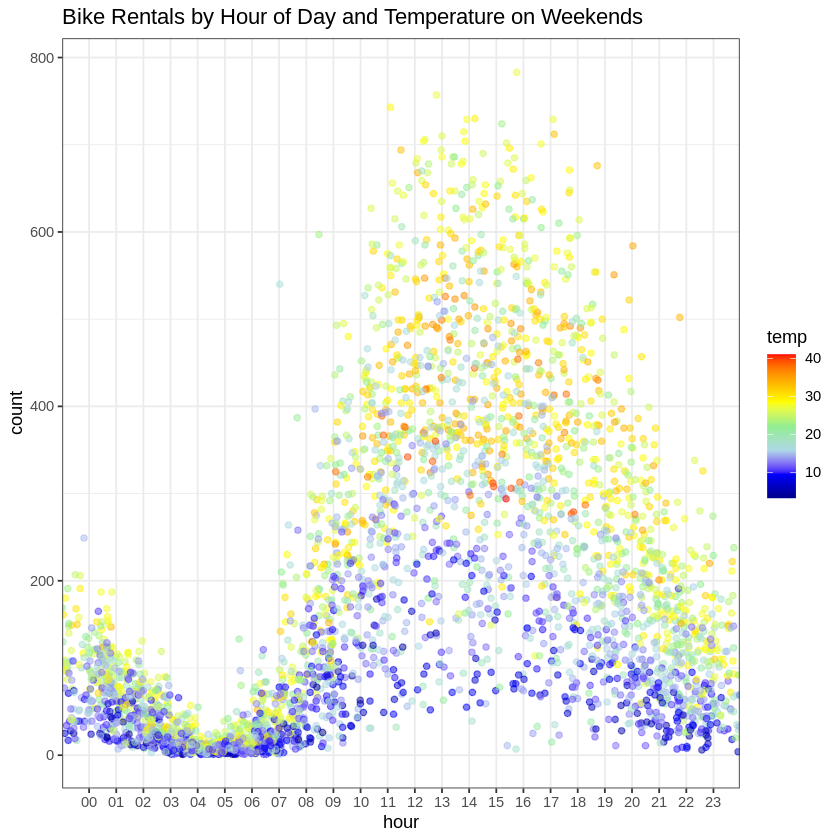

In [ ]:
#Visualise bike rentals by hour and temperature on weekends
pl <- ggplot(filter(bike,workingday==0), aes(hour, count))
pl <- pl + geom_point(position=position_jitter(w=1, h=0),aes(color = temp),alpha=0.5)
pl <- pl + scale_color_gradientn(colors = c('dark blue', 'blue', 'light blue', 'light green', 'yellow', 'orange', 'red'))
pl + theme_bw() + ggtitle("Bike Rentals by Hour of Day and Temperature on Weekends")

We can see from both graphs that during the week there is a spike between 7am and 10am and then again between 5pm and 7pm. Where the weekend rentals begin increasing from 7am and doesn't start decreasing until around 6pm.

## Build the model
I will first build a test model to predict count based on tempreture.

In [ ]:
temp.model <- lm(count ~ temp, bike)
print(summary(temp.model))


Call:
lm(formula = count ~ temp, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16



The model has produced a Estimated Standard Deviation otherwise known as Standard error of Regression (SER) of 6.0462 for the intercept and 9.1705 for the temp variable. The model is predicting that when the temperature (x) is 0 degrees celcius there will be 6 bike rentals and that for every temperature increase of 1 degree celcius the number of bike rentals will increase by 9.1.

Using this prediction how many bike rentals would there be if the temperature was 25 degrees celcius?

In [ ]:
#Y (SER) + X(SER)*25 degrees
6.0462 + 9.1705*25

[1] 235.3087

In [ ]:
bike$hour <- sapply(bike$hour, as.numeric)

I will now build a model using the following features:
<ul>
<li>season</li>
<li>holiday</li>
<li>workingday</li>
<li>weather</li>
<li>temp</li>
<li>humidity</li>
<li>windspeed</li>
<li>hour</li>
</ul>

In [ ]:
model <- lm(count ~ ., bike)

In [ ]:
model_update <- update(model, . ~ . -datetime - atemp - casual - registered)

In [ ]:
print(summary(model_update))


Call:
lm(formula = count ~ season + holiday + workingday + weather + 
    temp + humidity + windspeed + hour, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-v

Based on this data, the model has predicted 46 bike rentals when the temperature is 0 degrees celcius.

The Linear regression model does not fit well to this dataset as it cannot take into account the seasonality of the data and is thrown off by the overall increase in bike rentals.
